In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


In [113]:
data=pd.read_csv('day.csv')
data2=pd.read_csv('test.csv')


In [40]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [41]:
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [42]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     499 non-null    int64  
 1   dteday      499 non-null    object 
 2   season      499 non-null    int64  
 3   yr          499 non-null    int64  
 4   mnth        499 non-null    int64  
 5   holiday     499 non-null    int64  
 6   weekday     499 non-null    int64  
 7   workingday  499 non-null    int64  
 8   weathersit  499 non-null    int64  
 9   temp        499 non-null    float64
 10  atemp       499 non-null    float64
 11  hum         499 non-null    float64
 12  windspeed   499 non-null    float64
 13  casual      499 non-null    int64  
 14  registered  499 non-null    int64  
 15  cnt         499 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 62.5+ KB


In [44]:
data.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,2.206413,0.268537,5.515030,0.028056,2.995992,0.683367,1.408818,18.979325,22.316516,62.601307,13.212513,706.577154,3030.551102,3737.128257
std,144.193157,1.095573,0.443643,3.459066,0.165299,2.009012,0.465630,0.557175,7.350670,8.038017,15.282889,5.278390,612.099032,1194.650805,1538.501032
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,9.000000,416.000000,431.000000
25%,125.500000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.998189,15.843550,50.666050,9.313000,226.500000,2111.500000,2463.000000
50%,250.000000,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,18.518347,22.222300,62.666700,12.707689,603.000000,3176.000000,3926.000000
75%,374.500000,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,25.215000,28.725925,73.791650,16.083618,900.000000,3845.500000,4761.500000
max,499.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,42.044800,97.250000,34.000021,3252.000000,5950.000000,8362.000000


In [45]:
data.groupby('holiday')['instant'].count(),data.groupby('workingday')['instant'].count()

(holiday
 0    485
 1     14
 Name: instant, dtype: int64,
 workingday
 0    158
 1    341
 Name: instant, dtype: int64)

In [46]:
data.groupby('season')['instant'].count()

season
1    169
2    147
3     94
4     89
Name: instant, dtype: int64

In [47]:
#1:spring, 2:summer, 3:fall, 4:winter

In [48]:
data.groupby('weekday')['instant'].count(),data.groupby('workingday')['instant'].count()

(weekday
 0    72
 1    72
 2    71
 3    70
 4    71
 5    71
 6    72
 Name: instant, dtype: int64,
 workingday
 0    158
 1    341
 Name: instant, dtype: int64)

In [50]:
data.apply(lambda x:len(x.unique()))

instant       499
dteday        499
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          386
atemp         480
hum           443
windspeed     466
casual        430
registered    473
cnt           481
dtype: int64

In [114]:
#Renaming the columns:

data = data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
data2 = data2.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})


In [115]:
#dropping unecessary columns
data=data.drop(columns=['instant','dteday','year'])
data2=data2.drop(columns=['instant','dteday','year'])

EDA


In [54]:
data.columns

Index(['season', 'month', 'holiday', 'weekday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

[Text(0.5, 1.0, 'Count of bikes during different months')]

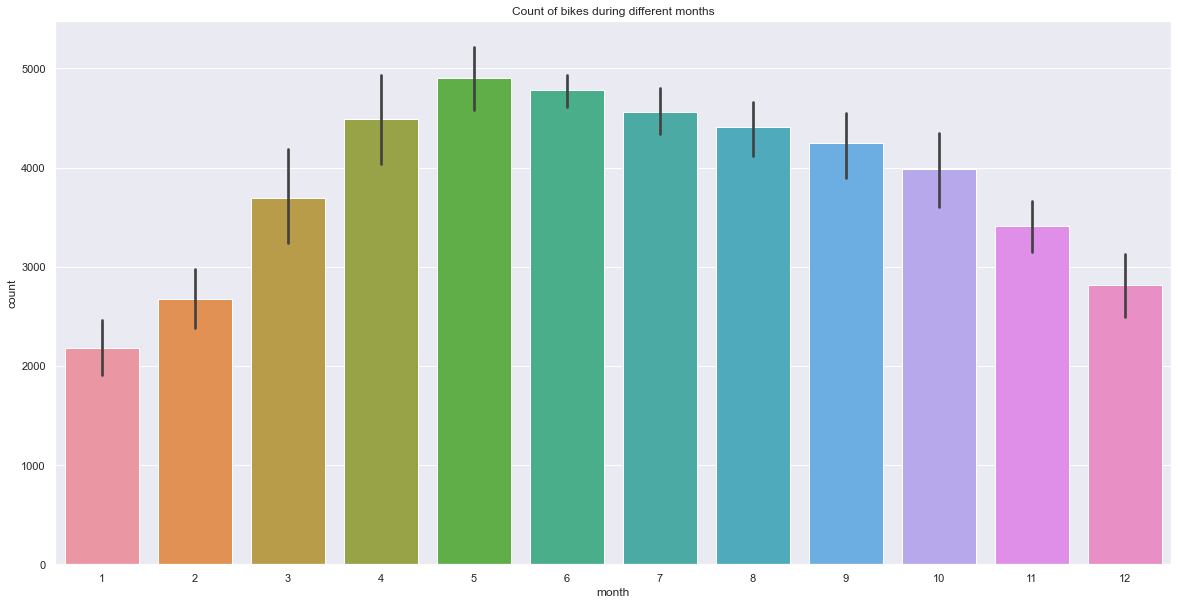

In [62]:
#displaying the months during which there were high rentals
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

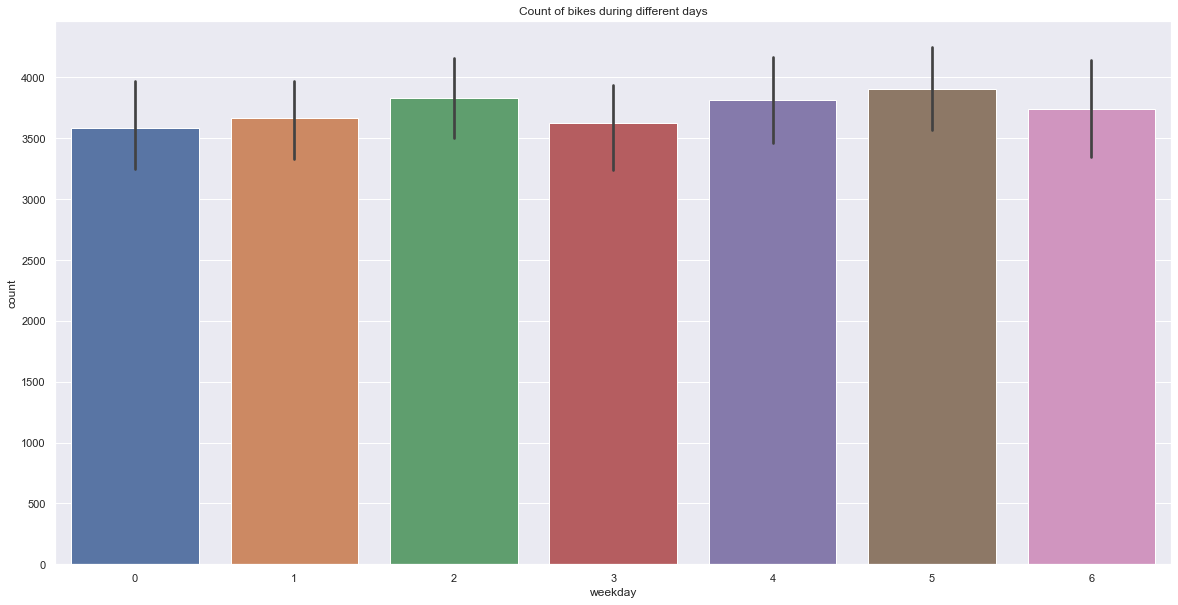

In [64]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

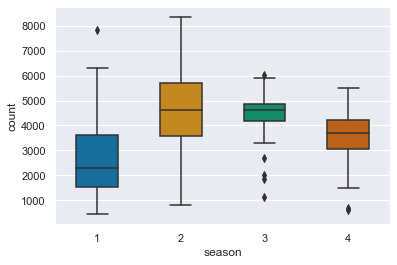

In [111]:
#grouping by season, plot the box plot
season_group= (data.groupby("season"))["count"].sum()
season_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='season',data=data,width=0.5,palette="colorblind")
plt.show()

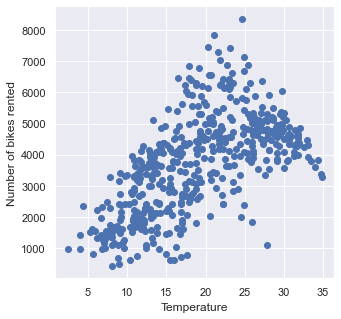

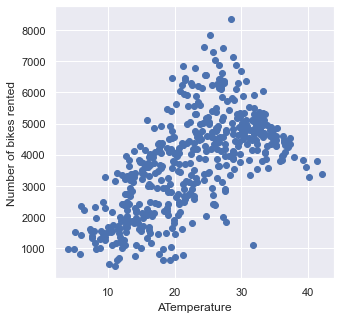

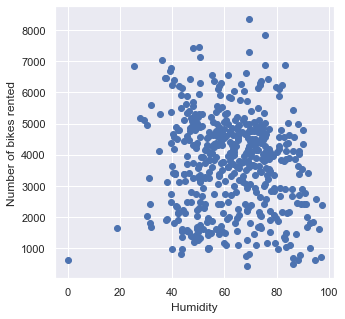

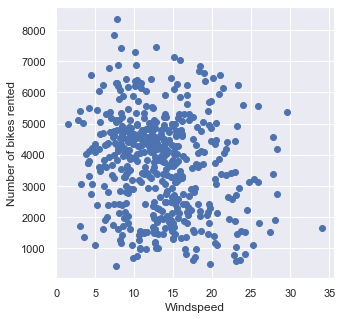

In [82]:
#Checking for relationship with numerical variables:
#temp humidity atemp and windspeed

plt.figure(figsize=(5,5))
plt.scatter(data['temp'],data['count'])
plt.xlabel("Temperature")
plt.ylabel("Number of bikes rented")

plt.figure(figsize=(5,5))
plt.scatter(data['atemp'],data['count'])
plt.xlabel("ATemperature")
plt.ylabel("Number of bikes rented")

plt.figure(figsize=(5,5))
plt.scatter(data['humidity'],data['count'])
plt.xlabel("Humidity")
plt.ylabel("Number of bikes rented")

plt.figure(figsize=(5,5))
plt.scatter(data['windspeed'],data['count'])
plt.xlabel("Windspeed")
plt.ylabel("Number of bikes rented")


plt.show()

<AxesSubplot:>

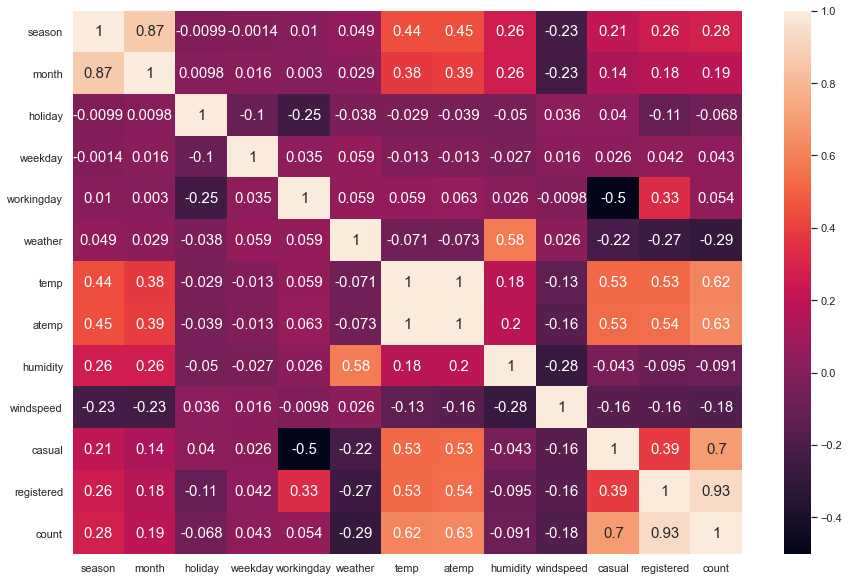

In [76]:
#correlation matrix
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [86]:
#performing one hot encoding for the categorical variables
new_data = data

def one_hot_encoding(data1, column):
    data1 = pd.concat([data1, pd.get_dummies(data1[column], prefix=column, drop_first=True)], axis=1)
    data1 = data1.drop([column], axis=1)
    return data1

cols = ['season','month','holiday','weekday','workingday','weather']

for col in cols:
    new_data = one_hot_encoding(new_data, col)
new_data.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [116]:
#performing one hot encoding for the categorical variables
new_data2 = data2

def one_hot_encoding(data1, column):
    data1 = pd.concat([data1, pd.get_dummies(data1[column], prefix=column, drop_first=True)], axis=1)
    data1 = data1.drop([column], axis=1)
    return data1

cols = ['season','month','holiday','weekday','workingday','weather']

for col in cols:
    new_data2 = one_hot_encoding(new_data2, col)
new_data2.head()

,temp,atemp,humidity,windspeed,casual,registered,season_2,season_3,season_4,month_6,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,26.103347,29.79875,69.7917,8.208304,991,6433,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,24.326653,28.63065,52.0000,15.374825,1242,6142,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,23.130847,27.55605,52.3333,9.166739,1521,6118,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,24.600000,28.34540,45.6250,5.626325,3410,4884,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,25.454153,29.19835,53.0417,17.042589,2704,4425,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
#dropping more columns
#from the scatter plot,temperature and atemperature serves same info
#windspeed do not contribute asa decision factor
#also casual and registered rentals do not carry any importance as it adds upto count
#hence these columns are dropped
X = new_data.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
Y = new_data['count']

new_data2= new_data2.drop(columns=['atemp', 'windspeed', 'casual', 'registered'], axis=1)

In [91]:
X.head()

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,14.110847,80.5833,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,69.6087,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,43.6957,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [92]:
Y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: count, dtype: int64

In [93]:
#wewill be implementing three type of models first
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [94]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
         RandomForestRegressor(),
         ]

In [99]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))
   

In [96]:
for model in models:
    train(model)

C:\Users\irisj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\irisj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\irisj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Model: LinearRegression()
CV score: 3753538.9118350917
Model: DecisionTreeRegressor()
CV score: 2890754.8774343436
Model: RandomForestRegressor()
CV score: 2295683.8298679716


In [104]:
#Lets implement random forest
#test data which is new_dat2 is gives as x_test
x_train=X
x_test=new_data2
y_train=Y


In [118]:
#predicting given test data
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [121]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1030.4761976321433